# Scraper
In this first part we will scrape the data from the urls stored into the file "urls_list.txt". The scraped data will be stored into a data frame and a "data.csv"

In [268]:
from selectorlib import Extractor
import requests 
import json 
import pandas as pd
from time import sleep
import csv
from dateutil import parser as dateparser

In [269]:
# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

In [270]:
# Scraping function
def scrape(url):    
    headers = {
        'authority': 'www.amazon.com',
        'pragma': 'no-cache',
        'cache-control': 'no-cache',
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'none',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-dest': 'document',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }

    # Download the page using requests
    #print("Downloading %s"%url)
    r = requests.get(url, headers=headers)
    # Simple check to check if page was blocked (Usually 503)
    if r.status_code > 500:
        if "To discuss automated access to Amazon data please contact" in r.text:
            print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
        else:
            print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
        return None
    # Pass the HTML of the page and create 
    return e.extract(r.text)


In [271]:
# Create an empty data frame
df = pd.DataFrame(columns=["title","content","date","variant","images","verified","author","rating","product","url"])

# Create an empty list
product_data = []

# Scraping part, reading the list of the "urls_list.txt" to scrape and saving the data into the "data.csv" and the empty df
with open("urls_list.txt",'r') as urllist, open('data.csv','w', encoding='utf-8') as outfile:
    
    # instancing an empty csv to populate with data
    writer = csv.DictWriter(outfile, fieldnames=["title","content","date","variant","images","verified","author","rating","product","url"],quoting=csv.QUOTE_ALL)
    writer.writeheader()
    
    for url in urllist.readlines():
        data = scrape(url) 
        if data:
            i = 0
            for r in data['reviews']:
                r["product"] = data["product_title"]
                r['url'] = url
                try:
                    if 'verified' in r:
                        if 'Verified Purchase' in r['verified']:
                            r['verified'] = 'Yes'
                        else:
                            r['verified'] = 'Not Verified'
                except:
                    pass

                r['rating'] = r['rating'].split(' out of')[0]
                date_posted = r['date'].split('on ')[-1]
                if r['images']:
                    r['images'] = "\n".join(r['images'])
                r['date'] = dateparser.parse(date_posted).strftime('%d %b %Y')

                print(r)

                # append the data to the empty list
                product_data.append([str(r['title']), str(r['content']), str(r['date']),  str(r['variant']), str(r['images']), str(r['verified']), str(r['author']), str(r['rating']), str(r['product']), str(r['url'])])
                
                # write data to csv
                writer.writerow(r)
                
                i=i+1

            sleep(1)

{'title': 'Look just like the photo', 'content': 'I love the shoes they are true to size , I wear a 7 1/2 but I ordered a 8 to allow a little extra room and I got just that', 'date': '18 Sep 2018', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': 'https://images-na.ssl-images-amazon.com/images/I/81wdRdaAfmL._SY88.jpg', 'verified': 'Yes', 'author': 'Diane Johnson', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent\n'}
{'title': 'After 20 returns', 'content': 'Just writing a rare review on these . I love Nike’s but my feet don’t usually. So I’ve ordered and returned a lot. Tried again lol and these ARE AMAZING comfortable. So much that I may order 3 more this year just to have them. The color is so cute and clean and sporty. I’m 99.9% sure I’ve dinally found a pair of Nikes

{'title': 'Love them!!!!!!', 'content': 'This is the first time I have ever bought shoes for myself online so I was a bit scared/sceptical, but they fit perfectly. I was in an auto accident and my shoes were ruined. I was unable to go shopping due to injuries and I am so thankful they fit perfectly!!', 'date': '12 Feb 2019', 'variant': 'Size: 7.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Lea Vanderlei', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3&sortBy=recent\n'}
{'title': 'Pretty shoe but runs small', 'content': 'I wear a 7 in most shoes, my Brooks shoes are a 7.5 so I ordered these in a 7.5 too and unfortunately they’re too small. The shoe is quite stiff going on, not a lot of give in them at all. I’m not sure I could run in these but they’re so b

{'title': 'Very hard shoes', 'content': "I'm a Nike shoes expert, I always wear Nike for my workouts cause simply it's the best choice for me and I always order them online. This time I was amazed by the design, the color.. everything but when it reached. I was a bit disappointed :( the quality is way too poor for Nike brand, the shoes is so hard on my feet and toes although I have a very slim foot and the shoes is wide! so it's really big  NO for this model for me.", 'date': '01 Feb 2020', 'variant': 'Size: 9.5 Color: Black/White/Mtlc Cool Grey', 'images': None, 'verified': 'Yes', 'author': 'Shereen El Mahdy', 'rating': '3.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_arp_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4&sortBy=recent\n'}
{'title': 'Nice', 'content': "Left foot feels like you have a bunches up sock under your toes. I took out the inserts and it'

{'title': 'These are my go to tennis shoes!!', 'content': "I have had several pairs of these shoes, usually bought at stores, but haven't been able to find them anywhere lately. Found these on Amazon, they were more expensive here, $109 or so, but I know how they fit and I love them!", 'date': '30 Jul 2019', 'variant': 'Size: 9 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Sara', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_6?ie=UTF8&reviewerType=all_reviews&pageNumber=6&sortBy=recent\n'}
{'title': 'Perfect', 'content': 'I’ve seen these shoes on someone else and fell in love with them. I ordered them for myself and I love them on me too. They’re comfortable and look great.', 'date': '04 Nov 2018', 'variant': 'Size: 7.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author'

{'title': 'Four Stars', 'content': 'very comfy.', 'date': '06 Aug 2018', 'variant': 'Size: 7 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Jayne Morgan', 'rating': '4.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_8?ie=UTF8&reviewerType=all_reviews&pageNumber=8&sortBy=recent\n'}
{'title': 'Awesome fit & awesome support', 'content': 'Best shoes I have found in a long time. I love these shoes', 'date': '27 Apr 2019', 'variant': 'Size: 7.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Kathy Dwyer', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_8?ie=UTF8&reviewerType=all_reviews&pageNumber=8&sortBy=recent\n'}
{'title': 'Amazing beautiful 

{'title': "Fit great, don't have to break in.", 'content': "I really wanted the bigger 'Shox' but they were really expensive. These shoes are a great second option, just a little heavier than my last pair.", 'date': '12 Nov 2019', 'variant': 'Size: 8.5 Color: Black/White/Mtlc Cool Grey', 'images': None, 'verified': 'Yes', 'author': 'Amazon Customer', 'rating': '4.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_10?ie=UTF8&reviewerType=all_reviews&pageNumber=10&sortBy=recent\n'}
{'title': "I think it's the men's and not women's shoe.", 'content': "The toe part of the shoe is boxie looking. Over all a nice shoe just nit what I was looking for. It looks like the man's shoe. I really don't think it is the women's shoe.", 'date': '14 Aug 2019', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Aprile Logsdon

{'title': 'good looking shoe and comfortable love them', 'content': 'very comfortable and a very good looking shoe to ma as in pretty they have my favorite colors i was worried about the size cuz i normally wear a size 6 1/2 and they where sold out so i went ahead and got a size 7 and they fit great i dont run so not really sure how they feel during a run but im gonna go ahead and give them 5 stars love my nike', 'date': '04 Mar 2020', 'variant': 'Size: 7 Color: Black/White/Mtlc Cool Grey', 'images': None, 'verified': 'Yes', 'author': 'Katherine Moore', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_12?ie=UTF8&reviewerType=all_reviews&pageNumber=12&sortBy=recent\n'}
{'title': 'Great shoe', 'content': 'Very comfortable', 'date': '26 Dec 2018', 'variant': 'Size: 6 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author

{'title': 'Returned them', 'content': 'Terribly made. Had to return them.', 'date': '28 Dec 2019', 'variant': 'Size: 6.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Teena Mulcahy', 'rating': '2.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_14?ie=UTF8&reviewerType=all_reviews&pageNumber=14&sortBy=recent\n'}
{'title': 'Thumbs up', 'content': 'Love the look, fit is just right. Thumbs up', 'date': '23 Apr 2020', 'variant': 'Size: 8.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Cathi Henry', 'rating': '4.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_14?ie=UTF8&reviewerType=all_reviews&pageNumber=14&sortBy=recent\n'}
{'title': 'Makes my foot look s

{'title': 'Perfect!', 'content': 'Such a comfy shoe for running! I love it! And it came early, thank you!', 'date': '24 Apr 2020', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Sabrina Lincicome', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_16?ie=UTF8&reviewerType=all_reviews&pageNumber=16&sortBy=recent\n'}
{'title': 'Great sneakers', 'content': 'Good looking sneaker very vomfortable', 'date': '26 Jul 2019', 'variant': 'Size: 6 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Karen P Hoven', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_16?ie=UTF8&reviewerType=all_reviews&pageNumber=16&sortBy=recent\n'

{'title': 'Love it', 'content': 'Love these shoes, super comfy when ur on ur feet so much and doing a lot wo walking ... fast shipping.', 'date': '24 Feb 2020', 'variant': 'Size: 9.5 Color: Black/White/Mtlc Cool Grey', 'images': None, 'verified': 'Yes', 'author': 'Melissa Stumpf', 'rating': '4.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_18?ie=UTF8&reviewerType=all_reviews&pageNumber=18&sortBy=recent\n'}
{'title': 'Very comfortable!', 'content': 'I needed the support in this shoe for my back', 'date': '30 Apr 2020', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Carol Fonseca', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_18?ie=UTF8&reviewerType=all_rev

{'title': 'Very good!', 'content': 'Excelent!', 'date': '21 Dec 2019', 'variant': 'Size: 7 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Juan R.', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_20?ie=UTF8&reviewerType=all_reviews&pageNumber=20&sortBy=recent\n'}
{'title': 'Very disappointed', 'content': 'NEVER had a problem with sneakers before until now....so when I finally tried them on, it was too late to return! Not a happy camper.', 'date': '08 Oct 2019', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Terry P', 'rating': '1.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_20?ie=UTF8&reviewerType=all_reviews&pageNum

{'title': 'Love these shoes!', 'content': 'Great purchase!', 'date': '25 Jun 2019', 'variant': 'Size: 8.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'MCunningham', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber=22&sortBy=recent\n'}
{'title': 'Not for me', 'content': 'Not my style', 'date': '16 Feb 2019', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'isabel', 'rating': '4.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber=22&sortBy=recent\n'}
{'title': 'Don’t buy', 'content': 'Not worth it! If you want pain, buy these. After I

{'title': 'Excelente producto', 'content': 'Super conforme con mi compra estos tenis son muy comodos estan super lindos hice mi rutina de ejercicios ((HIT)) y los senti muy bien me encantaron Gracias Amazon ❤', 'date': '11 Apr 2020', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Amazon Customer', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_24?ie=UTF8&reviewerType=all_reviews&pageNumber=24&sortBy=recent\n'}
{'title': 'Most comfortable Nike shoes ever made', 'content': 'The most comfortable Nike shoes I ever bought. These are by far my favorite ❤️ I want every color', 'date': '14 Nov 2019', 'variant': 'Size: 10 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Tricia Lynn', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url'

{'title': 'Hard to get on', 'content': 'Hard to get on', 'date': '21 Mar 2019', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Amazon Customer', 'rating': '1.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_26?ie=UTF8&reviewerType=all_reviews&pageNumber=26&sortBy=recent\n'}
{'title': 'Extremely comfortable', 'content': 'There is nothing to dislike. I love wearing them and I get a lot of comments on them. Way worth the money.', 'date': '15 Jun 2019', 'variant': 'Size: 9 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Shara', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_26?ie=UTF8&reviewerType=all_reviews&pageNumber=26&s

{'title': 'Excellent quality', 'content': 'Nursing', 'date': '11 Dec 2019', 'variant': 'Size: 8 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'blondie', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_28?ie=UTF8&reviewerType=all_reviews&pageNumber=28&sortBy=recent\n'}
{'title': 'Bad', 'content': 'Shoes came with a small piece of poop inside smelled very bad', 'date': '01 Mar 2020', 'variant': 'Size: 8.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Anthony vonderhaar', 'rating': '1.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_28?ie=UTF8&reviewerType=all_reviews&pageNumber=28&sortBy=recent\n'}
{'title': 'tight shoes', 'content': 'very t

{'title': 'Size', 'content': 'Love them very nice fits right', 'date': '21 Mar 2020', 'variant': 'Size: 6.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'kellie huffman', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews&pageNumber=30&sortBy=recent\n'}
{'title': 'Delivered on time and fit perfectly.', 'content': 'Work at hospital.', 'date': '05 Mar 2020', 'variant': 'Size: 6.5 Color: White/Metallic Silver/Dark Grey', 'images': None, 'verified': 'Yes', 'author': 'Delphia Blue', 'rating': '5.0', 'product': "Nike Women's Reax Run 5 Running Shoes", 'url': 'https://www.amazon.com/Nike-Womens-Reax-Running-Shoes/product-reviews/B07ZPL752N/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews&pageNumber=30&sortBy=recent\n'}
{'title': 'Not wide enough', 'content': '

In [272]:
# number of reviews scraped
len(product_data)

300

## Add rows to the empty data frame

In [273]:
i = 0
for ls in product_data:
    df.loc[i] = ls
    i = i+1
    

In [274]:
df.head(5)

,title,content,date,variant,images,verified,author,rating,product,url
0,Look just like the photo,"I love the shoes they are true to size , I wea...",18 Sep 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Diane Johnson,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
1,After 20 returns,Just writing a rare review on these . I love N...,08 May 2019,Size: 10 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,sherlain miranda,4.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
2,Half size up :),"I have only run in them a couple of times, but...",14 Dec 2018,Size: 9.5 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Blondie,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
3,Surprisingly comfortable,I have a very hard time finding shoes that are...,26 Aug 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,None,Yes,E Diaz,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
4,Cute and Stylish..,Great workout shoes. Very comfortable.,04 Sep 2017,None,https://images-na.ssl-images-amazon.com/images...,Yes,Angel Buchanan,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...


In [288]:
# convert the string date to datetime
df['date'] = pd.to_datetime(df['date'])

# sort the df by date
df.sort_values('date', ascending=False, inplace=True)

# Sentiment Analysis
After the scraping we perform the sentiment analysis on the reviews

In [275]:
from textblob import TextBlob
i = 0
for comment in df.content:
    #Convert text to a textblob and find polarity
    activityBlob=TextBlob(comment)
    polarity= activityBlob.sentiment.polarity

    polarityString="NEUTRAL"
    if polarity > 0 :
        polarityString="POSITIVE"
    elif polarity < 0 :
        polarityString="NEGATIVE"
        
    # populate df
    df.loc[i, 'polarity'] = polarity
    df.loc[i, 'polarityString'] = polarityString
    i =i+1
    
    print (polarity, polarityString, comment)
    print('--------------------------------------------------------------------')

0.165625 POSITIVE I love the shoes they are true to size , I wear a 7 1/2 but I ordered a 8 to allow a little extra room and I got just that
--------------------------------------------------------------------
0.40151515151515155 POSITIVE Just writing a rare review on these . I love Nike’s but my feet don’t usually. So I’ve ordered and returned a lot. Tried again lol and these ARE AMAZING comfortable. So much that I may order 3 more this year just to have them. The color is so cute and clean and sporty. I’m 99.9% sure I’ve dinally found a pair of Nikes I’m not going to return , fingers crossed 🤞😊
--------------------------------------------------------------------
0.240530303030303 POSITIVE I have only run in them a couple of times, but so far they feel great. I normally wear a size 9, and I ordered a 9.5, and I’m glad I did. There is plenty of room, but not too much. The only thing that will take me getting used to is that they are slightly bulkier than my ASICS. Like any running shoe

0.258125 POSITIVE Fits great, very comfortable.  Little wide at toes.
--------------------------------------------------------------------
0.65 POSITIVE Love the shoe fits great
--------------------------------------------------------------------
0.0 NEUTRAL Like the shoe over all
--------------------------------------------------------------------
0.45 POSITIVE So cute and comfortable
--------------------------------------------------------------------
-1.0 NEGATIVE Terribly made. Had to return them.
--------------------------------------------------------------------
0.3952380952380952 POSITIVE Love the look, fit is just right. Thumbs up
--------------------------------------------------------------------
0.24999999999999997 POSITIVE Loved these shoes . Just to narrow for my foot.
--------------------------------------------------------------------
-0.25 NEGATIVE Sent the wrong product totally different from picture.
-------------------------------------------------------------------

0.0 NEUTRAL Nursing
--------------------------------------------------------------------
-0.5799999999999998 NEGATIVE Shoes came with a small piece of poop inside smelled very bad
--------------------------------------------------------------------
-0.23214285714285715 NEGATIVE very tight
--------------------------------------------------------------------
0.05555555555555555 POSITIVE The shoe was good- took a while to break in but not great. It gets dirty easily (being white) and doesn’t have as much support as some others
--------------------------------------------------------------------
0.65 POSITIVE No words can tell how I am happy wearing this shoes,needs more of this
--------------------------------------------------------------------
0.0 NEUTRAL Buenos para caminar
--------------------------------------------------------------------
-0.3 NEGATIVE Makes toes numb and i bought a size larger
--------------------------------------------------------------------
0.7333333333333334 P

## Sentiment Percentage

In [276]:
df_polarit = df.groupby(['polarityString']).count().reset_index()
df_polarit = df_polarit.loc[:,['polarityString', 'title']]
df_polarit.rename(columns = {'polarityString':'Sentiment', 'title':'Count'}, inplace = True)
df_polarit

,Sentiment,Count
0,NEGATIVE,25
1,NEUTRAL,47
2,POSITIVE,228


In [277]:
import plotly.express as px

fig = px.pie(df_polarit, values='Count', names='Sentiment',
             title='Sentiment Percentage',
             hover_data=['Sentiment'])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_image('plots/sentiment-percentage.png')
fig.show()

## Ratings Count

In [278]:
# craete dataframe
df_rating = df.groupby(['rating']).count().reset_index()
df_rating = df_rating.loc[:,['rating', 'title']]
df_rating.rename(columns = {'title':'count'}, inplace = True)

In [282]:
df_rating['rating'] = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']

In [283]:
# visualize
import plotly.graph_objects as go

x_value = df_rating['rating'] 
y_value = df_rating['count']

fig = go.Figure([go.Bar(x = x_value, y = y_value)])
fig.update_layout(title_text='Customer Rating')
fig.write_image('plots/customer-rating.png')
fig.show()

## Rating Percentage

In [284]:
fig = px.pie(df_rating, values='count', names='rating',
             title='Rating Percentage',
             hover_data=['rating'], 
             labels={'count':'count'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_image('plots/rating-percentage.png')
fig.show()

## Visualize Sentiment by Date

In [290]:
# We modify the date keeping only the year and the month
def NewDate(date):
    newDate = (str(date.year) + '-' + str(date.month))
    return newDate

df['date'] = df['date'].apply(lambda x: NewDate(x))

In [291]:
# groupby date
df_date = df.groupby(['date', 'polarityString']).count().reset_index()
df_date.sort_values('date', ascending = False, inplace = True)

# subset and rename 
df_date = df_date.loc[:, ['date','polarityString','title']]
df_date.rename(columns = {'title':'count'}, inplace = True)

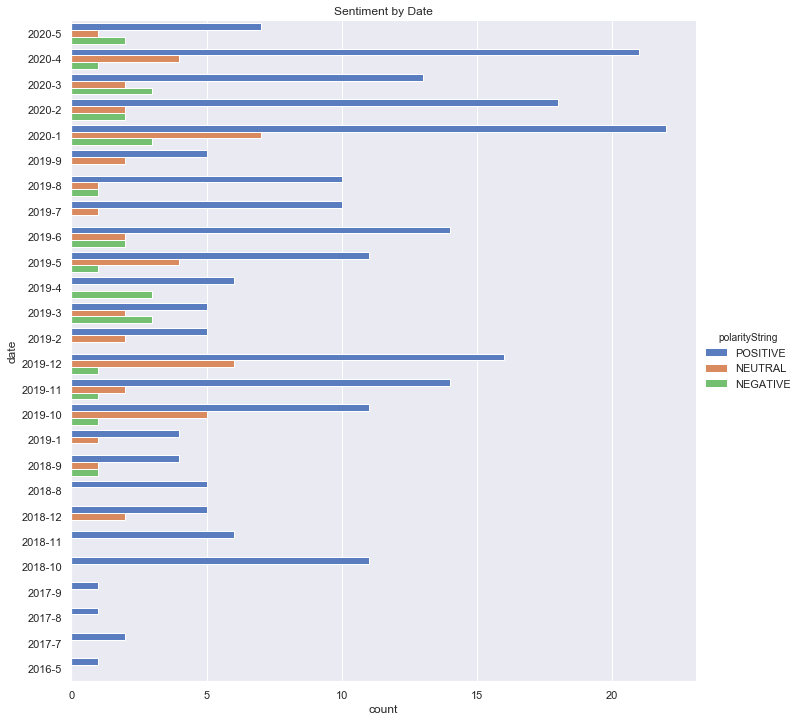

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="count", y="date", hue="polarityString", data= df_date, height=10, kind="bar", palette="muted")
plt.title('Sentiment by Date')

g.savefig('plots/sentiment-date.png')

In [299]:
df

,title,content,date,variant,images,verified,author,rating,product,url,polarity,polarityString
209,Good quality,I think maybe I could’ve got a extra wide 7 1/...,2020-5,Size: 7.5 Color: White/Metallic Silver/Dark Grey,None,Yes,lilliean,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,-0.033333,NEGATIVE
298,Good shoe slightly pricey,Surprisingly comfortable usually nike shoes ar...,2020-5,Size: 8.5 Color: Black/White/Mtlc Cool Grey,None,Yes,Brandi,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,-0.016667,NEGATIVE
165,Bomb.com,They look good. They are super comfortable to ...,2020-5,Size: 8.5 Color: White/Metallic Silver/Dark Grey,None,Yes,julia munson,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.477778,POSITIVE
55,💘,"I read all reviews. They were stiff, but I wor...",2020-5,Size: 7 Color: White/Metallic Silver/Dark Grey,None,Yes,CHARLENE MARLOW,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.274286,POSITIVE
112,PERFECT WALKIN SHOE :),Ahhhhh . This is a perfect walking shoe,2020-5,Size: 8 Color: White/Metallic Silver/Dark Grey,None,Yes,Lil,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,1.000000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Cute and Stylish..,Great workout shoes. Very comfortable.,2017-9,None,https://images-na.ssl-images-amazon.com/images...,Yes,Angel Buchanan,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.660000,POSITIVE
6,Great shoes,This is my second pair. I think these shoes ar...,2017-8,Size: 9 Color: White/Metallic Silver/Dark Grey,None,Yes,Amy Klein,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.073611,POSITIVE
169,Superb running shoe!,Received in a timely manner from the seller. ...,2017-7,Size: 8 Color: White/Metallic Silver/Dark Grey,None,Yes,J4ssss,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.200000,POSITIVE
5,"Great, Comfortable Shoe",This is my second pair. They are the most com...,2017-7,Size: 9 Color: White/Metallic Silver/Dark Grey,None,Yes,msgrnbay,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...,0.205682,POSITIVE


# Visualize sells by date

In [315]:
# groupby 
df_sell = df.groupby(['date', 'verified']).count().reset_index()
df_sell = df_sell.loc[:, ['date', 'title']]
df_sell.rename(columns = {'title':'sells'}, inplace = True)

In [316]:
# plot the number of sells by date
x_value = df_sell['date']
y_value = df_sell['sells']

fig = go.Figure([go.Bar(x = x_value, y = y_value)])

fig.update_traces(marker_color='rgb(230, 115, 0)')

fig.update_layout(title_text='Sells by Date')

fig.write_image('plots/sells.png')

fig.show()